In [ ]:
!pip install scanpy==1.4.5.1

     |████████████████████████████████| 6.5MB 4.2MB/s 
     |████████████████████████████████| 122kB 40.7MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 


In [ ]:
import numpy
import pandas
import sys
import requests
import scanpy
import anndata
import random
from matplotlib import pyplot
from matplotlib import cm
from urllib.parse import urljoin

In [ ]:
def DownloadFile(url, local_filename):
    r = requests.get(url)
    f = open(local_filename, 'wb')
    for chunk in r.iter_content(chunk_size=512 * 1024): 
        if chunk: # filter out keep-alive new chunks
            f.write(chunk)
    f.close()
    return

In [ ]:
def get_pseudo_h5(root, name):
  p = Path(name)
  if not p.exists():
    DownloadFile(urljoin(root, name), p)
  return scanpy.read_h5ad(p)

In [ ]:
c1_pseudo = 'http://woldlab.caltech.edu/~diane/encode-202006-jamboree-detrout-rna-sc-pipeline/c1_pseudo/'

In [ ]:
c1_kallisto_counts = get_pseudo_h5(c1_pseudo, 'kallisto_gene_counts.h5ad')
c1_star_counts = get_pseudo_h5(c1_pseudo, 'star_gene_counts.h5ad')

In [ ]:
def sc_scatter(left, right, cell_id, left_name, right_name, ax=None):
    gridalpha = 0.5
    def is_spike(x):
        if x.startswith('gSpikein_') or x.startswith('tSpikein_'):
            return True
        else:
            return False

    if ax is None:
        f = pyplot.figure()
        ax = f.subplots(1,1)
    
    set1 = cm.get_cmap('Set1').colors
    colors = [{True: set1[0], False: set1[1]}[is_spike(x)] for x in left.var_names]

    ax.plot([-5,10], [-5,10], c=set1[2])
    #x_cells = numpy.asarray(table[name_x][cell_id].X.todense())
    #y_cells = numpy.asarray(table[name_y][cell_id].X.todense())
    ax.scatter(left[cell_id].X+0.01, right[cell_id].X+0.01, color=colors, s=2)
    #spearman = correlations[name_x][name_y][cell_id]
    count = numpy.sum((left[cell_id].X > 0) & (right[cell_id].X > 0))
    ax.set_title(f'id {cell_id}\nCount: {count}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(left_name)
    ax.set_ylabel(right_name)
    ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)


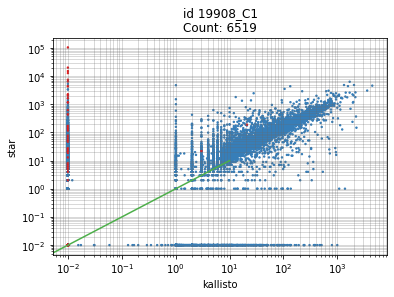

In [ ]:
sc_scatter(c1_kallisto_counts, c1_star_counts, '19908_C1', 'kallisto', 'star')

In [ ]:
cells = numpy.random.choice(c1_kallisto_counts.obs_names, 10)
cells

array(['18276_G9', '20048_E5', '20038_F3', '18252_B11', '18261_D11',
       '20042_D10', '18254_D9', '20038_F5', '20042_D7', '18262_E6'],
      dtype=object)

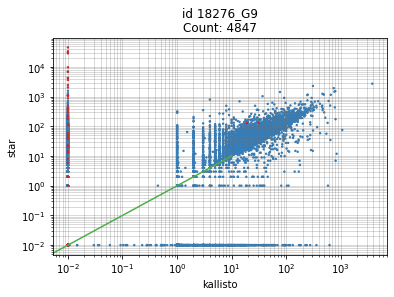

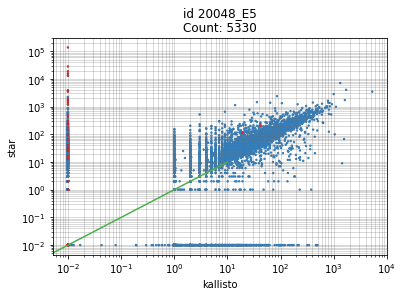

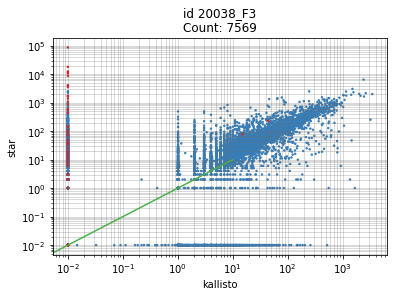

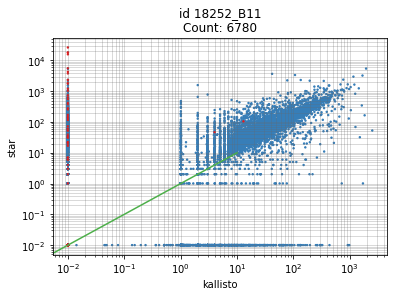

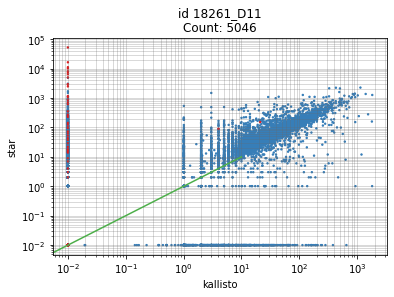

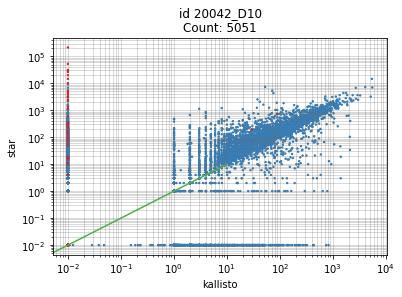

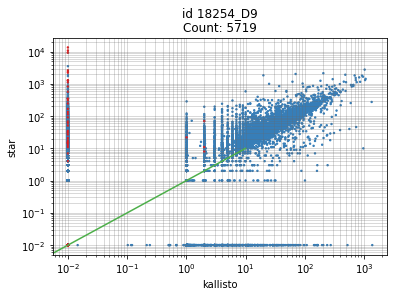

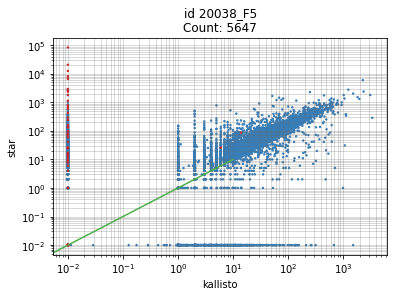

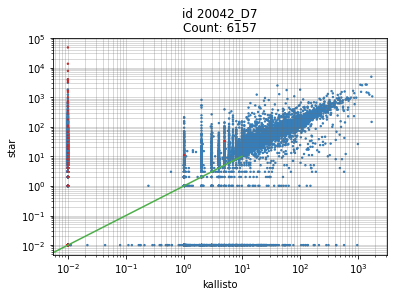

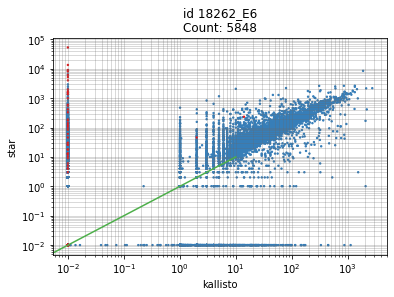

In [ ]:
for c in cells:
  sc_scatter(c1_kallisto_counts, c1_star_counts, c, 'kallisto', 'star')